Seniment Analysis Using Natural Language processing


In [ ]:
import numpy as np
import pandas as pd
df=  pd.read_csv("/content/amazon_reviews.csv")
df.head(10)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,f9994249-97ba-4d1f-a610-92cb42a05d72,Cheryl Lambert,"i love Amazon, always reasonable with there pr...",5,0,30.7.0.100,2025-04-13 13:38:34,30.7.0.100
1,083b1405-88fb-416a-959c-b930e7037759,Soul Feeders,Amazon is censoring their customer reviews any...,1,0,30.7.0.100,2025-04-13 13:22:38,30.7.0.100
2,fb779857-250e-42ab-bb3b-71d666b196f0,Lynn Hill,I will always shop with Amazon,5,0,30.7.0.100,2025-04-13 13:09:17,30.7.0.100
3,73b9543e-639b-4768-8c46-69061a4d1078,Oliver Dunham,App ignores notification preferences and pushe...,1,0,30.6.0.100,2025-04-13 13:00:50,30.6.0.100
4,45b57dcd-7eba-46ec-aa62-6925594f866a,David Austin,"it's too bloated now, with too many sponsored ...",1,0,30.7.0.100,2025-04-13 12:51:02,30.7.0.100
5,a5c0d9f5-72d9-46c3-b33b-44a6e5bfb91e,V,Being led to a modal about prime every single ...,1,0,30.6.0.100,2025-04-13 12:43:14,30.6.0.100
6,d32fed06-9b00-4f22-b7f0-89ee4cd870a0,Rina Lea,app has been glitching for 2wks now. i cannot ...,1,0,30.7.0.100,2025-04-13 12:32:03,30.7.0.100
7,64cf477c-6f94-4411-a519-f06fb02210d0,James Devers,Amazon has really started to burn some bridges...,2,0,30.7.0.100,2025-04-13 12:07:26,30.7.0.100
8,4f5792d8-53ff-423a-80ed-28248dd878a9,Linda Machell White,Amazon is gracious enough to deliver me all of...,5,0,30.7.0.100,2025-04-13 11:57:38,30.7.0.100
9,c3e8798c-b06a-418e-915c-10e3aa24392f,J D,"I am so mad right now, I have been a customer ...",1,0,30.7.0.100,2025-04-13 11:54:59,30.7.0.100


In [ ]:
df.isnull().sum()

,0
reviewId,0
userName,5
content,5
score,0
thumbsUpCount,0
reviewCreatedVersion,7987
at,0
appVersion,7987


In [ ]:
df=df[['content','score']]
df.head(5)

,content,score
0,"i love Amazon, always reasonable with there pr...",5
1,Amazon is censoring their customer reviews any...,1
2,I will always shop with Amazon,5
3,App ignores notification preferences and pushe...,1
4,"it's too bloated now, with too many sponsored ...",1


In [ ]:
df.dropna(subset=['content'], inplace=True)
df = df[df['content'].str.strip() != '']
df.head()

,content,score
0,"i love Amazon, always reasonable with there pr...",5
1,Amazon is censoring their customer reviews any...,1
2,I will always shop with Amazon,5
3,App ignores notification preferences and pushe...,1
4,"it's too bloated now, with too many sponsored ...",1


In [ ]:
import re
import string
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'<.*?>', '', text)               # remove HTML tags
    text = re.sub(r'http\S+|www\S+', '', text)      # remove URLs
    text = re.sub(r'\d+', '', text)                 # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    text = re.sub(r'\s+', ' ', text).strip()        # remove extra spaces
    return text

df['cleaned_content'] = df['content'].apply(clean_text)
df.head()


,content,score,cleaned_content
0,"i love Amazon, always reasonable with there pr...",5,i love amazon always reasonable with there pri...
1,Amazon is censoring their customer reviews any...,1,amazon is censoring their customer reviews any...
2,I will always shop with Amazon,5,i will always shop with amazon
3,App ignores notification preferences and pushe...,1,app ignores notification preferences and pushe...
4,"it's too bloated now, with too many sponsored ...",1,its too bloated now with too many sponsored it...


In [ ]:
def map_score(score):
    if score >= 4:
        return 'positive'
    elif score == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['score'].apply(map_score)


In [ ]:
df[['cleaned_content', 'sentiment']].head()


,cleaned_content,sentiment
0,i love amazon always reasonable with there pri...,positive
1,amazon is censoring their customer reviews any...,negative
2,i will always shop with amazon,positive
3,app ignores notification preferences and pushe...,negative
4,its too bloated now with too many sponsored it...,negative


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Download necessary resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab') # Download the punkt_tab resource

stop_words = set(stopwords.words('english'))

custom_stopwords = {"amazon", "prime", "order", "delivery", "item", "app", "product"}
stop_words.update(custom_stopwords)

lemmatizer = WordNetLemmatizer()

def process(text):
    words = word_tokenize(text)
    tokens= [lemmatizer.lemmatize(word.lower()) for word in words if word.lower() not in stop_words and word.isalpha()]
    return ' '.join(tokens)

df['no_stopwords'] = df['cleaned_content'].apply(process)
df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


,content,score,cleaned_content,sentiment,no_stopwords
0,"i love Amazon, always reasonable with there pr...",5,i love amazon always reasonable with there pri...,positive,love always reasonable price customer service
1,Amazon is censoring their customer reviews any...,1,amazon is censoring their customer reviews any...,negative,censoring customer review anything dont want k...
2,I will always shop with Amazon,5,i will always shop with amazon,positive,always shop
3,App ignores notification preferences and pushe...,1,app ignores notification preferences and pushe...,negative,ignores notification preference push multiple ...
4,"it's too bloated now, with too many sponsored ...",1,its too bloated now with too many sponsored it...,negative,bloated many sponsored item popups get buy stu...


Exploratory data analysis


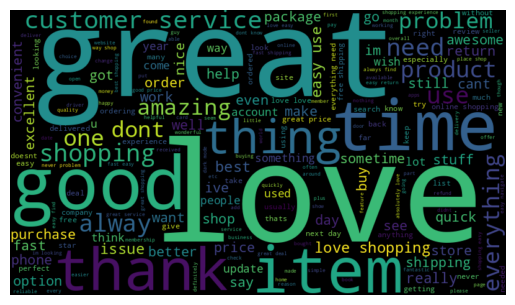

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Join all positive words from the DataFrame's 'cleaned_text' column
positive_words = ' '.join(df[df['sentiment'] == 'positive']['no_stopwords'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=460).generate(positive_words)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Feature Extraction

- TF-IDF  
- CountVectorizer  
- Word2Vec (from Deep Learning)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer with a max feature limit
vectorizer = TfidfVectorizer(max_features=5000)
# Fit and transform the cleaned text column
X = vectorizer.fit_transform(df['no_stopwords'])
# Assuming you're also extracting the target labels
y = df['sentiment']


### Model Building
- Logistic regression
- Svm
- Navie Bayes
- Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

    negative       0.83      0.95      0.89      8278
     neutral       0.32      0.03      0.06      1254
    positive       0.88      0.85      0.87      4965

    accuracy                           0.84     14497
   macro avg       0.67      0.61      0.60     14497
weighted avg       0.80      0.84      0.81     14497



### Deep Learning Model

In [ ]:
#  Text Preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Tokenization
tokenizer = Tokenizer(num_words=20000)
tokenizer.fit_on_texts(df['no_stopwords'])  # assuming df is your DataFrame

# Text to sequences
X_seq = tokenizer.texts_to_sequences(df['no_stopwords'])

# Padding sequences
X_padded = pad_sequences(X_seq, maxlen=200)

# Label Encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(df['sentiment'])

# Model Building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential([
    Embedding(input_dim=20000, output_dim=128, input_length=200),
    LSTM(64),
    Dense(len(set(y_encoded)), activation='softmax')  # auto-detect number of classes
])

# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
model.fit(X_padded, y_encoded, epochs=5, validation_split=0.2)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 294s 158ms/step - accuracy: 0.7972 - loss: 0.5649 - val_accuracy: 0.8471 - val_loss: 0.4395
Epoch 2/5
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 278s 153ms/step - accuracy: 0.8583 - loss: 0.3904 - val_accuracy: 0.8471 - val_loss: 0.4466
Epoch 3/5
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 331s 158ms/step - accuracy: 0.8771 - loss: 0.3335 - val_accuracy: 0.8398 - val_loss: 0.4694
Epoch 4/5
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 317s 155ms/step - accuracy: 0.8985 - loss: 0.2804 - val_accuracy: 0.8296 - val_loss: 0.5085
Epoch 5/5
1813/1813 ━━━━━━━━━━━━━━━━━━━━ 321s 155ms/step - accuracy: 0.9186 - loss: 0.2280 - val_accuracy: 0.8260 - val_loss: 0.5951


In [ ]:
!pip install streamlit pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 62.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.3 MB/s eta 0:00:00


In [ ]:
from keras.saving import save_model
save_model(model, "sentiment_model.keras")

import pickle
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

In [ ]:
%%writefile app.py
import streamlit as st
import numpy as np
from keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle

# Load model in .keras format
model = load_model('sentiment_model.keras')

# Load tokenizer
with open('tokenizer.pkl', 'rb') as f:
    tokenizer = pickle.load(f)

# Load label encoder
with open('label_encoder.pkl', 'rb') as f:
    label_encoder = pickle.load(f)

# Streamlit UI
st.title("🔥 Sentiment Predictor (Modern Edition)")
st.write("Enter a sentence to detect the vibe using our fancy LSTM model 🤖")

user_input = st.text_area("Your text here:")

if st.button("Analyze Sentiment"):
    if user_input.strip() == "":
        st.warning("Don’t ghost me. Type something first.")
    else:
        seq = tokenizer.texts_to_sequences([user_input])
        padded = pad_sequences(seq, maxlen=200)

        prediction = model.predict(padded)
        label = np.argmax(prediction, axis=1)
        sentiment = label_encoder.inverse_transform(label)

        st.success(f"🧠 Predicted Sentiment: **{sentiment[0]}**")


Writing app.py


In [ ]:
!ngrok authtoken 2vcLY2Ut1SUUIGjOUqCLcdTPxym_3eyGeDfe2bgJYVnrBTM38

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
